In [2]:
import pandas as pd
customers = pd.read_csv('customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0, 0.5, 'Spending Score')

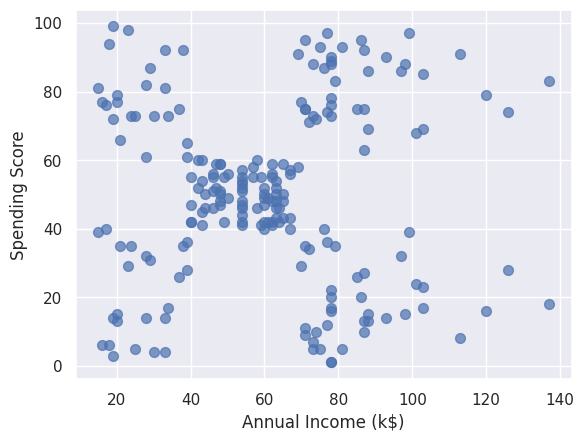

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
points = customers.iloc[:, 3:5].values
x = points[:, 0]
y = points[:, 1]
plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

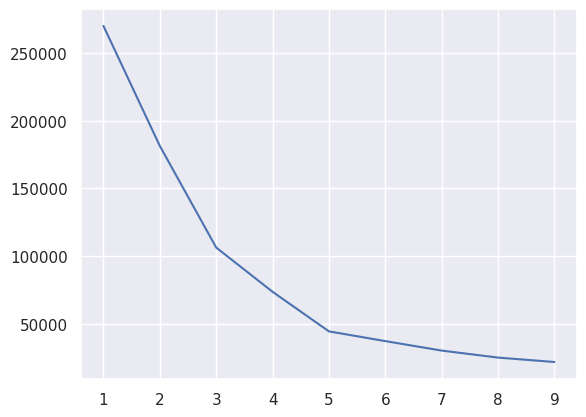

In [4]:
from sklearn.cluster import KMeans

inertias=[]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(points)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,10),inertias)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Spending Score')

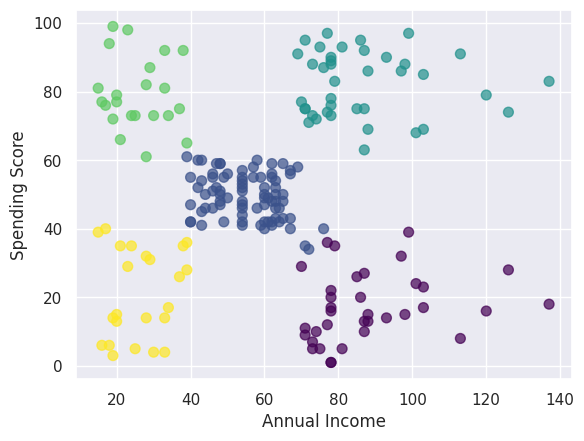

In [5]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)
plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


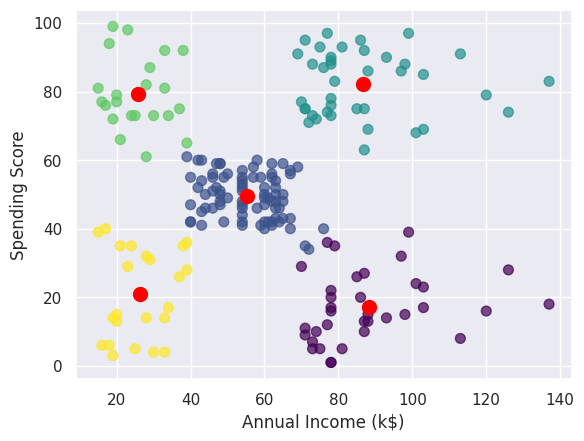

In [6]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)
plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

In [7]:
centers

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [8]:
#copy of customers
cc=customers.copy()
cc["Cluster"]=kmeans.predict(points)
cc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [9]:
import numpy as np
cluster = kmeans.predict(np.array([[120, 20]]))[0]
cluster

0

In [10]:
clustered_df = cc[cc['Cluster'] == cluster]

In [11]:
clustered_df['CustomerID'].values

array([125, 129, 131, 135, 137, 139, 141, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199])

In [12]:
from sklearn.preprocessing import LabelEncoder

df = customers.copy()
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [13]:
points= df.iloc[:, 1: 5].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

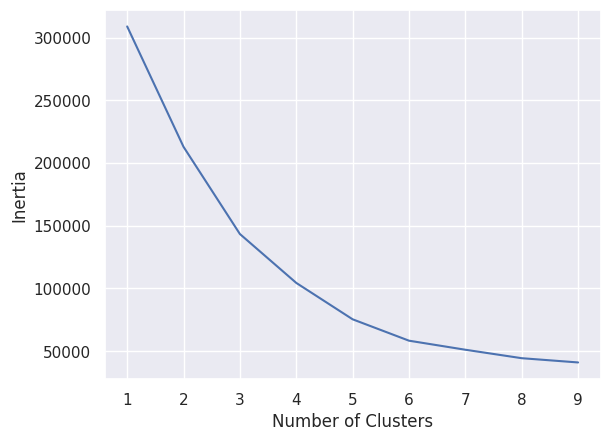

In [14]:
inertia1=[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertia1.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia1)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [15]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)

df['Cluster'] = kmeans.predict(points)
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,4
2,3,0,20,16,6,0
3,4,0,23,16,77,4
4,5,0,31,17,40,0


In [16]:
results = pd.DataFrame(columns = ['Cluster', 'Average Age', 'Average Income', 'Average Spending Index', 'Number of Females', 'Number of Males'])

In [17]:
kmeans.cluster_centers_

array([[ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739]])

In [18]:
for i, center in enumerate(kmeans.cluster_centers_):
    age = center[1]    # Average age for current cluster
    income = center[2] # Average income for current cluster
    spend = center[3]  # Average spending score for current cluster

    gdf = df[df['Cluster'] == i]
    females = gdf[gdf['Gender'] == 0].shape[0]
    males = gdf[gdf['Gender'] == 1].shape[0]

    results.loc[i] = ([i, age, income, spend, females, males])

results.head()



,Cluster,Average Age,Average Income,Average Spending Index,Number of Females,Number of Males
0,0.0,45.217391,26.304348,20.913043,14.0,9.0
1,1.0,32.692308,86.538462,82.128205,21.0,18.0
2,2.0,43.088608,55.291139,49.569620,46.0,33.0
3,3.0,40.666667,87.750000,17.583333,17.0,19.0
4,4.0,25.521739,26.304348,78.565217,14.0,9.0
